# Setup

In [1]:
# links:
# bar graphs: https://www.reddit.com/r/dataisbeautiful/comments/855y7m/11_different_brands_of_aa_batteries_tested_in/#lightbox
# line graph: https://www.reddit.com/r/dataisbeautiful/comments/18h7k9g/how_heterosexual_couples_met_oc/#lightbox
# yearly heatmap: https://www.reddit.com/r/dataisbeautiful/comments/13ro2fw/oc_how_common_in_your_birthday/#lightbox
# scatter plot: https://www.reddit.com/r/dataisbeautiful/comments/kgwl1h/harry_potter_characters_screen_time_vs_mentions/
# 1d comparison: https://www.reddit.com/r/dataisbeautiful/comments/iqplrb/ratings_of_disney_animated_classics_vs_live/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.transforms import Bbox

In [114]:
daily = pd.read_csv('data/Day_sell_24_12_18.csv', delimiter=';')
daily['Date'] = pd.to_datetime(daily.Date, format="%d.%m.%Y")
daily['zn'] = daily['zn'].str.replace(',', '.').astype(float)
daily['sb'] = daily['sb'].str.replace(',', '.').astype(float)
daily['tax'] = daily['tax'].str.replace(',', '.').astype(float)
daily['day_of_month'] = daily.Date.dt.day
daily

,Date,zn,sb,tax,marza,day_of_month
0,2017-12-24,1334.95,1903.82,284.07,"284,8",24.0
1,2017-12-27,2154.04,2953.43,420.77,"378,62",27.0
2,2017-12-28,2120.66,2914.02,397.22,"396,14",28.0
3,2017-12-29,2280.09,3152.23,409.60,"462,54",29.0
4,2017-12-30,3463.87,4823.36,629.44,"730,05",30.0
...,...,...,...,...,...,...
357,2018-12-21,2757.31,3961.29,473.52,"730,46",21.0
358,2018-12-22,4416.64,6426.81,734.23,"1275,94",22.0
359,2018-12-23,2136.16,3134.60,415.48,"582,96",23.0
360,2018-12-24,3807.90,5518.87,701.45,"1009,52",24.0


In [4]:
pd.read_csv('data/ROTATION_of_products01.01.2018-09.01.2019.csv', delimiter=';', encoding='latin1')

,Pgroup,Lp,PKod,Pname,p_sale_in_time,Psale,Pavarage_stock,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,1.0,8478.0,BAMBINO SZAMPON 400 ML,"0,013368984","5,00","0,00",0,NaN
2,,1.0,17048.0,BELLA PODPASKI BLUE MAX,"0,024064171","9,00","0,00",0,NaN
3,,1.0,41.0,BELLA PODPASKI NORMAL 20 B/SKRZYD,"0,136363636","51,00","0,00",0,NaN
4,,1.0,2155.0,BELLA PODPASKI PERF.BLUE 10,"0,06684492","25,00","0,00",0,NaN
...,...,...,...,...,...,...,...,...,...
16329,,1.0,18937.0,ZESTAW PORZECZKOWA 350 ML +FANTA,0,"0,00","0,00",-,-
16330,,1.0,16148.0,"ZESTAW Z ZUBROWKA 0,7 L",0,"0,00","0,00",-,-
16331,,1.0,7453.0,"ZUBROWKA BIA?A 0,2 Z JALOWCEM",0,"0,00","0,00",-,-
16332,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
sales = pd.read_csv('data/SELL_1.csv', delimiter=';', encoding='latin1')
for col in sales.columns[5:]:
    sales[col] = sales[col].str.replace(',', '.').astype(float)

ValueError: could not convert string to float: ' '

In [6]:
sales

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,01.01.2018,5307,CHEMISTRY,PATYCZKI BELLA 200,1,"1,77","1,77","2,57","2,57","2,78","2,78",0,"31,13","0,8","0,8","0,01"
1,01.01.2018,5986,CHEMISTRY,ACE 1 L,1,"3,2","3,2","5,68","5,68","6,99","6,99","0,01","43,66","2,48","2,48","0,03"
2,01.01.2018,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
3,01.01.2018,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
4,01.01.2018,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4,"2,68","10,72","2,85","11,4","3,99","11,98","0,01","5,96","0,17","0,68","0,01"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,01.12.2018,6590,GENERAL,ZURAWINA 80 G HELIO,6,"1,85","11,1","3,05","18,3","3,29","19,74","0,02","39,34","1,2","7,2","0,04"
23176,01.12.2018,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2,"4,51","9,02","6,19","12,38","6,69","13,38","0,01","27,14","1,68","3,36","0,02"
23177,01.12.2018,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2,"1,83","3,66","2,62","5,24","3,22","6,44","0,01","30,15","0,79","1,58","0,01"
23178,01.12.2018,1775,GENERAL,ZUREK BUTELKA 0_5 L,2,"1,31","2,62","1,48","2,96","1,6","3,2",0,"11,49","0,17","0,34",0


# Data

# Examples

## Example 1: Bar Graph

### reddit example

![bar graph](data/examples/bargraph.jpg)

### data example

In [8]:
sales.Pgroup.value_counts()

Pgroup
SWEETS                                       2298
DAIRY_CHESSE                                 2297
CHEMISTRY                                    2152
DRINK_JUICE                                  2044
GENERAL_FOOD                                 1956
ICE_CREAMS_FROZEN                            1334
VEGETABLES                                    940
GENERAL                                       905
BEER                                          900
KETCH_CONCETRATE_MUSTARD_MAJO_HORSERADISH     877
CIGARETTES                                    850
SPICES                                        775
GROATS_RICE_PASTA                             635
VODKA_ALCOHOL                                 627
CHIPS_FLAKES                                  509
COFFEE TEA                                    482
BREAD                                         461
MEAT                                          427
FISH                                          373
CANNED_PATE                                

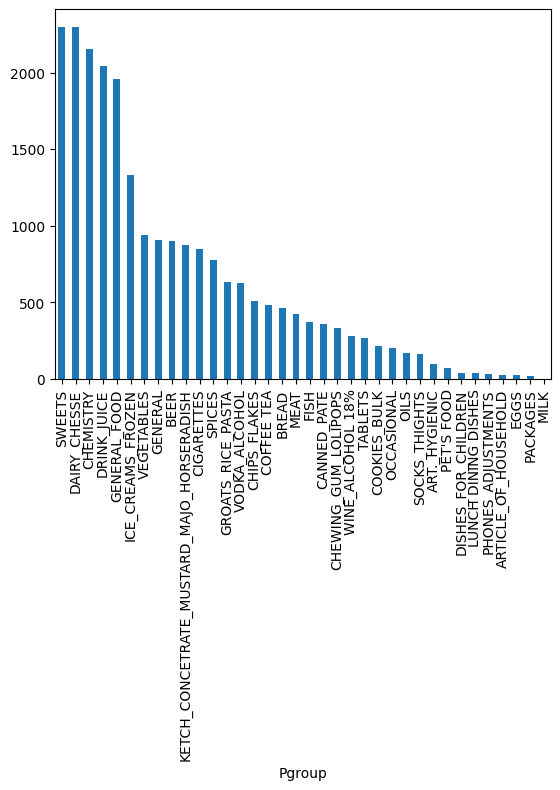

In [123]:
sales.Pgroup.value_counts().plot(kind='bar')
plt.show()

In [22]:
images = {
    'SWEETS': 'data/images/candy.jpg',
    'MILK': 'data/images/milk.jpg',
    'CHEMISTRY': 'data/images/chem.jpg',
    'DAIRY_CHESSE': 'data/images/milk.jpg',
    'GENERAL_FOOD': 'data/images/pasta.jpg',
    'DRINK_JUICE': 'data/images/juice.jpg',
    }

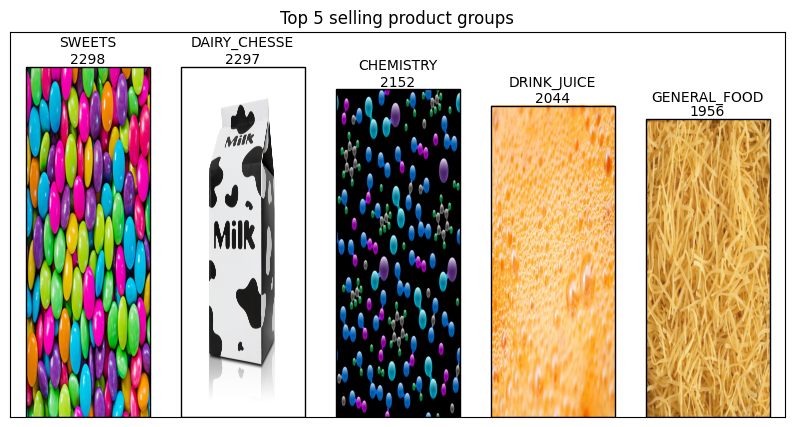

In [67]:
# now make it with the words on the bars
top_n = 5

ind = sales.Pgroup.value_counts().index[:top_n]
val = sales.Pgroup.value_counts().values[:top_n]

fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(ind, val, fill=False)
_s, labels = plt.xticks(rotation=90)
label_texts = [label.get_text() for label in labels]
files = [images[label_text] for label_text in label_texts]
imgs = [mpimg.imread(file) for file in files]


for _ in range(top_n):
    b_h, b_w = bars[_].get_height(), bars[_].get_width()
    b_x, b_y = bars[_].get_x(), bars[_].get_y()  
    left, right = (b_x), (b_x + b_w)
    bottom, top = (b_y), (b_y + b_h)
    ax.imshow(
        imgs[_], 
        extent = [left, right, bottom, top],
        aspect='auto',
        )
    ax.text(b_x + b_w/2, b_h, str(b_h), ha='center', va='bottom')
    ax.text(b_x + b_w/2, b_h*1.05, label_texts[_], ha='center', va='bottom')
    
ax.set_xlim(-0.5, top_n-0.5)
ax.set_ylim(0, max(val)*1.1)

plt.yticks([])
plt.xticks([])

plt.title('Top 5 selling product groups')

plt.show()

## Example 2: Line Graph

### Reddit Examples

![line graph](data/examples/linegraph.png)

### Data Example

In [68]:
sales.head()

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,01.01.2018,5307,CHEMISTRY,PATYCZKI BELLA 200,1,"1,77","1,77","2,57","2,57","2,78","2,78",0,"31,13","0,8","0,8","0,01"
1,01.01.2018,5986,CHEMISTRY,ACE 1 L,1,"3,2","3,2","5,68","5,68","6,99","6,99","0,01","43,66","2,48","2,48","0,03"
2,01.01.2018,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
3,01.01.2018,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
4,01.01.2018,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4,"2,68","10,72","2,85","11,4","3,99","11,98","0,01","5,96","0,17","0,68","0,01"


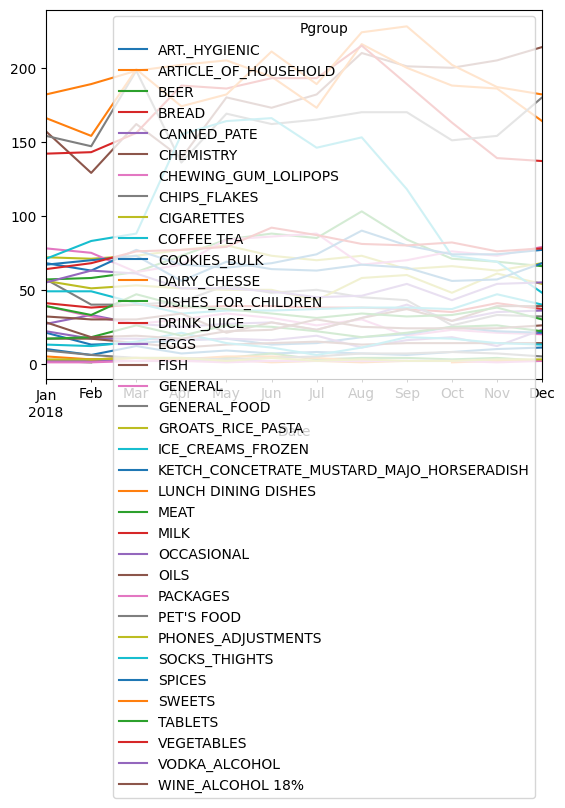

In [124]:
# plot the sales of products over time
sales['Date'] = pd.to_datetime(sales.Date, format="%d.%m.%Y")
sales = sales.sort_values('Date')

sales.groupby('Date').Pgroup.value_counts().unstack().plot()
plt.show()

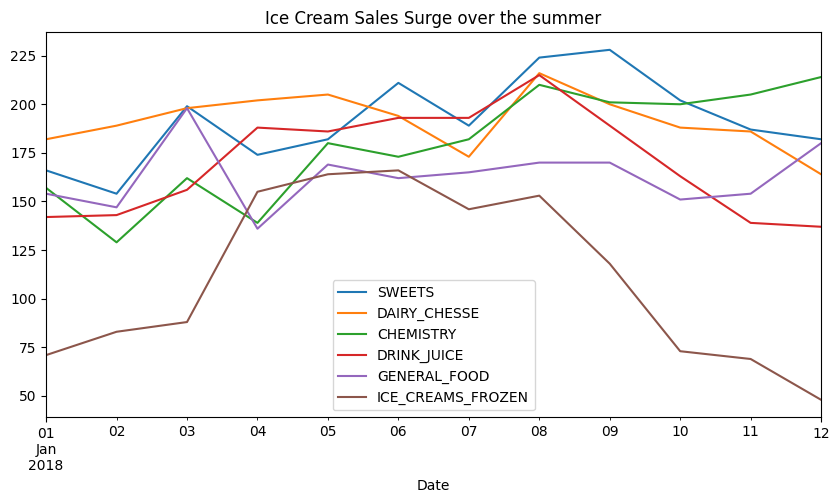

In [118]:
sales.groupby('Date').Pgroup.value_counts().unstack()
# now only plot the top 5
top_n = 6
top_products = sales.Pgroup.value_counts().index[:top_n]
_sales = sales[sales.Pgroup.isin(top_products)].groupby('Date').Pgroup.value_counts().unstack()#.plot()

# plot in matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
for product in top_products:
    _sales[product].plot(ax=ax, label=product)
plt.legend()
plt.title('Ice Cream Sales Surge over the summer')
# put a line at the start of summer
plt.axvline(pd.to_datetime('2018-06-21'), color='r', linestyle='--')

plt.show()

## Example 3: Yearly Heatmap

### Reddit Example

![Heatmap](data/examples/heatmap.png)

### Data Example

<Axes: xlabel='Date'>

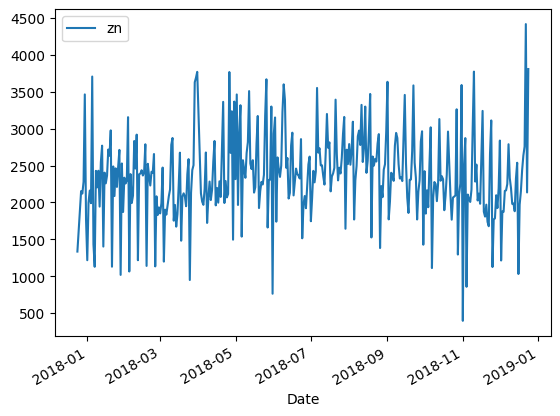

In [102]:
daily.plot(x='Date', y='zn')

In [105]:
# add "day of the week" column to daily
daily['day_of_week'] = daily.Date.dt.dayofweek

In [107]:
daily

,Date,zn,sb,tax,marza,day_of_week
0,2017-12-24,1334.95,1903.82,284.07,"284,8",6.0
1,2017-12-27,2154.04,2953.43,420.77,"378,62",2.0
2,2017-12-28,2120.66,2914.02,397.22,"396,14",3.0
3,2017-12-29,2280.09,3152.23,409.60,"462,54",4.0
4,2017-12-30,3463.87,4823.36,629.44,"730,05",5.0
...,...,...,...,...,...,...
357,2018-12-21,2757.31,3961.29,473.52,"730,46",4.0
358,2018-12-22,4416.64,6426.81,734.23,"1275,94",5.0
359,2018-12-23,2136.16,3134.60,415.48,"582,96",6.0
360,2018-12-24,3807.90,5518.87,701.45,"1009,52",0.0


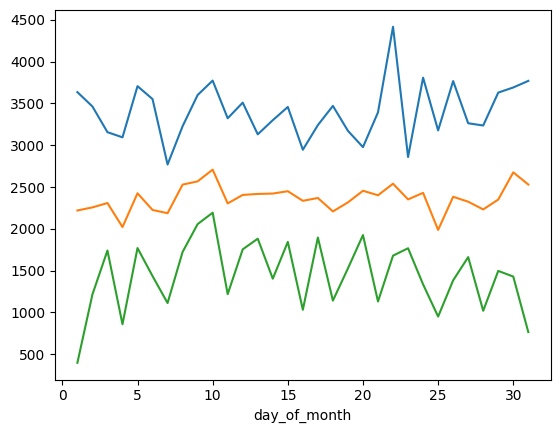

In [116]:
# plot sales over day of the month
daily.groupby('day_of_month').zn.max().plot()
daily.groupby('day_of_month').zn.mean().plot()
daily.groupby('day_of_month').zn.min().plot()
plt.show()

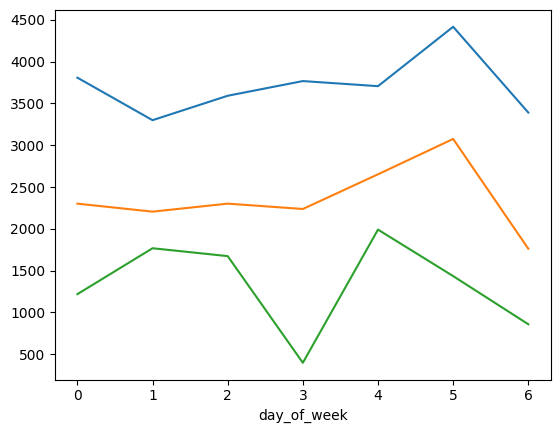

In [113]:
# plot the sales per day of the week
daily.groupby('day_of_week').zn.max().plot()
daily.groupby('day_of_week').zn.mean().plot()
daily.groupby('day_of_week').zn.min().plot()
plt.show()

## Example 4: Scatter Plot

### Reddit Example

![scatter plot](data/examples/scatterplot.jpg)

### Data Example

In [119]:
sales

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1,"1,77","1,77","2,57","2,57","2,78","2,78",0,"31,13","0,8","0,8","0,01"
12,2018-01-01,3067,GENERAL_FOOD,AMINO BLYSK GULASZOWA 61G,1,"0,82","0,82","1,51","1,51","1,59","1,59",0,"45,7","0,69","0,69","0,01"
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1,"3,2","3,2","5,68","5,68","6,99","6,99","0,01","43,66","2,48","2,48","0,03"
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4,"2,68","10,72","3,8","15,2","3,99","15,96","0,02","29,47","1,12","4,48","0,05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,6590,GENERAL,ZURAWINA 80 G HELIO,6,"1,85","11,1","3,05","18,3","3,29","19,74","0,02","39,34","1,2","7,2","0,04"
23176,2018-01-12,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2,"4,51","9,02","6,19","12,38","6,69","13,38","0,01","27,14","1,68","3,36","0,02"
23177,2018-01-12,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2,"1,83","3,66","2,62","5,24","3,22","6,44","0,01","30,15","0,79","1,58","0,01"
23153,2018-01-12,9801,CHEMISTRY,ZESZYT 96 W SZER LINIE,1,"1,99","1,99","2,92","2,92","3,59","3,59",0,"31,85","0,93","0,93","0,01"


In [120]:
# use a scatter plot to show the relationship between the price and the sales
plt.scatter(sales.zn, sales.sb)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Price vs Sales')

AttributeError: 'DataFrame' object has no attribute 'zn'

## Example 5: 1-D Comparison

### Reddit Example

![1D Comparison](data/examples/1dcomparison.jpg)

### Data Example